In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma,norm
import pandas as pd
%matplotlib inline

In [17]:
plt.style.use("ggplot")
#np.random.seed(123)

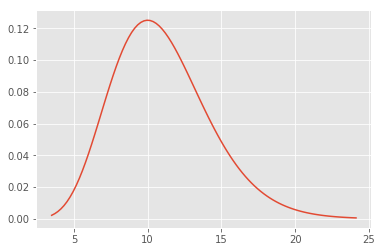

In [23]:
k=11
lam=1
x=np.linspace(gamma.ppf(0.001,k),gamma.ppf(0.999,k),100)
plt.plot(x,gamma.pdf(x,k,scale=1/lam))

In [24]:
f=lambda x,lam,k:-lam+(k-1)/x

In [25]:
def leap_flog(q,p,eps,lam,k,f):
    p_new=p+0.5*eps*f(q,lam,k)
    q_new=q+eps*p_new
    p_new=p_new+0.5*eps*f(q_new,lam,k)
    q,p=q_new,p_new
    return q,p

C:\Users\daima\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


accept_ratio: 1.0


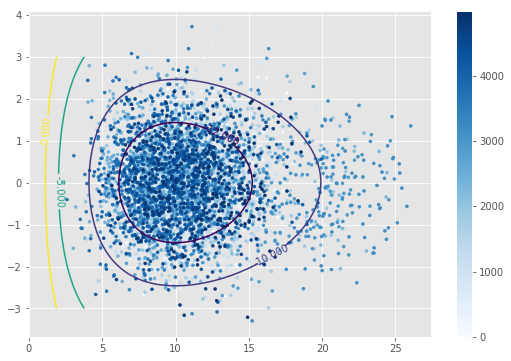

In [32]:
eps=1e-2
q,p=4.0,0.0
L=100
NMCS=10000
warmup=5000
leap_flog_arr=np.zeros([NMCS,2])
n_accept=0
for mcs in range(NMCS):
    hamiltonian_c=0.5*p**2+lam*q-(k-1)*np.log(q)
    q_c,p_c=q,p
    for i in range(L):
        q_c,p_c=leap_flog(q_c,p_c,eps,lam,k,f)
    hamiltonian_new=0.5*p_c**2+lam*q_c-(k-1)*np.log(q_c)
    if np.random.rand()<np.exp(hamiltonian_c-hamiltonian_new):
        q,p=q_c,p_c
        hamiltonian_c=hamiltonian_new
        n_accept+=1
    leap_flog_arr[mcs,:]=q,p
    p=norm.rvs()
df=pd.DataFrame(leap_flog_arr[warmup:],columns=["q","p"])
plt.figure(figsize=(9,6))
x,y=np.linspace(0,20,100),np.linspace(-3,3,100)
X,Y=np.meshgrid(x,y)
CS=plt.contour(X,Y,0.5*Y**2-(k-1)*np.log(x)+lam*x,levels=[-12,-10,-5,0])
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(df["q"][0],df["p"][0])
plt.scatter(df["q"],df["p"],marker=".",c=df.index,cmap="Blues")#c=df.index,cmap="Blue"の下りは点の更新を色の変化で表すためのｃとその色合いを指定するcmap
plt.colorbar()#色合いの変化をつける
print("accept_ratio:",n_accept/NMCS)

C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


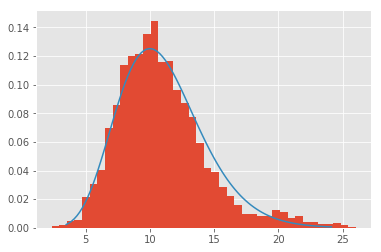

In [33]:
df["q"].hist(normed=True,bins=40)
x=np.linspace(gamma.ppf(0.001,k),gamma.ppf(0.999,k),100)
plt.plot(x,gamma.pdf(x,k,scale=1/lam))